<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Robot-Control/blob/master/LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [8]:
pip install numpy

In [9]:
pip install pandas

In [10]:
pip install opencv-python

In [11]:
2+2

4

In [12]:
import os
import cv2

print(f"OpenCV version is: {cv2.__version__}")

if True:  # change to True if you want to use the notebook locally
    # and use cv2_imshow from matplotlib (eg. Vscode)
    import matplotlib.pyplot as plt

    def cv2_imshow(img):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

OpenCV version is: 4.12.0


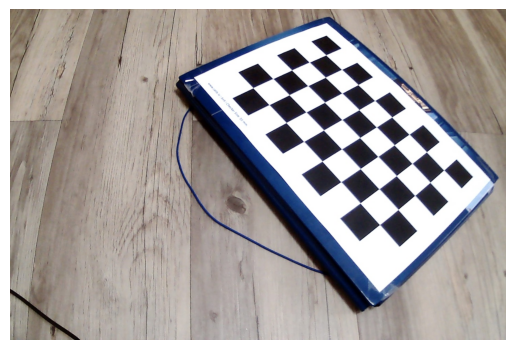

In [13]:
img1 = cv2.imread("img01.jpg")
cv2_imshow(img1)


In [14]:
folder = os.getcwd()
files = os.listdir(folder)

extensions = ('.jpg')
images = [f for f in files if f.lower().endswith(extensions)]
images.sort()
i = 0
photos = [None] * len(images)
for img_name in images:
    img_path = os.path.join(folder, img_name)
    photos[i] = cv2.imread(img_path)
    i = i+1

In [15]:
len(images)
print(photos[0])

[[[ 91 101 118]
  [ 91 101 118]
  [ 89 101 119]
  ...
  [ 86 103 116]
  [ 86 103 116]
  [ 85 102 115]]

 [[ 91 101 118]
  [ 89 102 118]
  [ 90 102 120]
  ...
  [ 85 102 115]
  [ 85 102 115]
  [ 85 102 115]]

 [[ 90 103 119]
  [ 91 104 120]
  [ 91 103 121]
  ...
  [ 82 101 114]
  [ 82 101 116]
  [ 82 101 116]]

 ...

 [[136 144 144]
  [133 141 141]
  [129 139 139]
  ...
  [168 173 174]
  [168 174 173]
  [167 173 172]]

 [[134 142 142]
  [138 146 146]
  [128 138 138]
  ...
  [168 173 174]
  [168 174 173]
  [168 174 173]]

 [[133 141 141]
  [143 151 151]
  [127 137 137]
  ...
  [169 174 175]
  [168 174 173]
  [168 174 173]]]


In [16]:
tf, cb = cv2.findChessboardCorners(photos[0],[8,5])

In [17]:
cb

array([[[ 917.426  ,  134.35933]],

       [[ 962.1635 ,  176.28986]],

       [[1010.55585,  220.78534]],

       [[1058.2596 ,  266.429  ]],

       [[1108.3718 ,  315.20425]],

       [[1157.9268 ,  364.30243]],

       [[1209.4664 ,  416.35443]],

       [[1261.744  ,  467.45532]],

       [[ 868.2524 ,  154.83151]],

       [[ 915.60046,  199.60464]],

       [[ 962.8437 ,  244.68816]],

       [[1013.49194,  293.32205]],

       [[1063.0573 ,  343.48773]],

       [[1115.6553 ,  395.4351 ]],

       [[1166.7773 ,  448.72433]],

       [[1220.5109 ,  502.54858]],

       [[ 818.16785,  178.36674]],

       [[ 863.9779 ,  223.15654]],

       [[ 913.537  ,  272.38605]],

       [[ 962.9144 ,  321.5377 ]],

       [[1015.55084,  374.46777]],

       [[1067.4491 ,  428.45355]],

       [[1121.5009 ,  485.3115 ]],

       [[1174.7987 ,  541.66235]],

       [[ 765.24475,  202.94193]],

       [[ 810.5315 ,  250.67226]],

       [[ 858.7879 ,  299.27383]],

       [[ 910.50256,  352.65

In [18]:
i = -1
chessboard_corners_set = []
photo_chessboard =[]
for photo in photos:
    i = i+1
    found, chessboard_corners = cv2.findChessboardCorners(photo,[8,5])
    if found == False:
        print("No chessboard found in", images[i])
    #if found == True:
    #    print("Found chessboard in", images[i])
    chessboard_corners_set.append(chessboard_corners)
    photo_draw = cv2.drawChessboardCorners(photo, (8, 5), chessboard_corners, found)
    photo_chessboard.append(photo_draw)



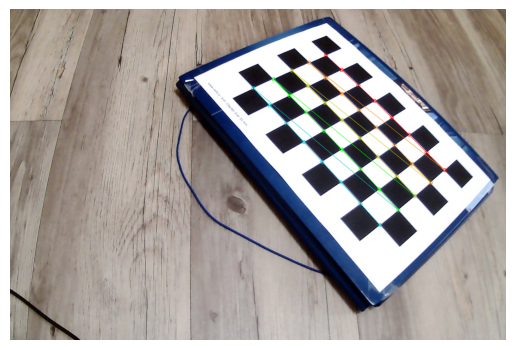

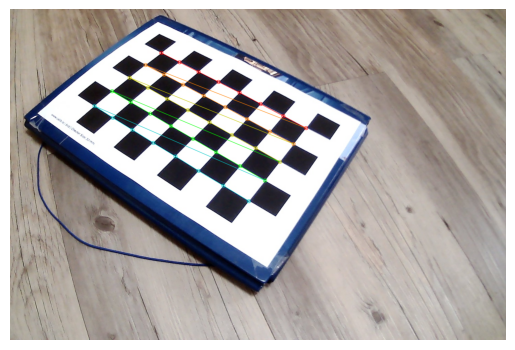

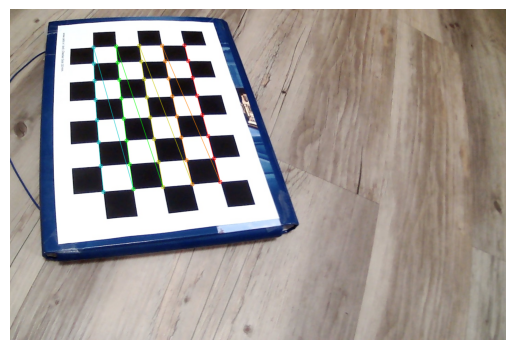

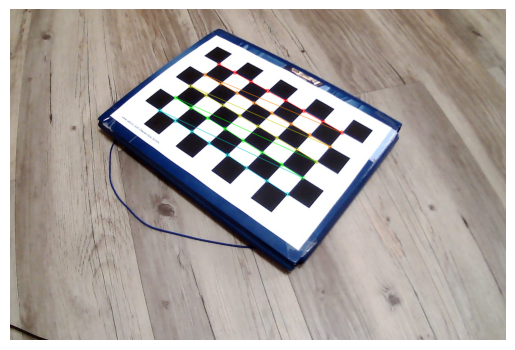

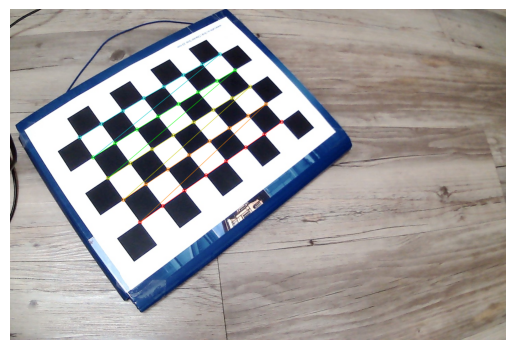

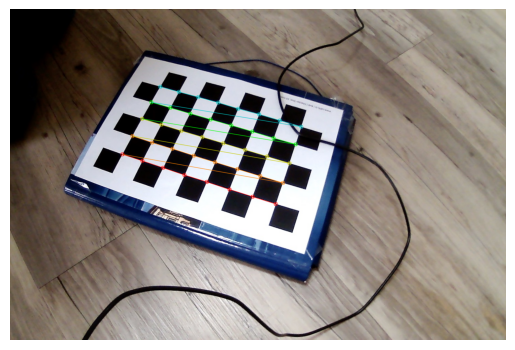

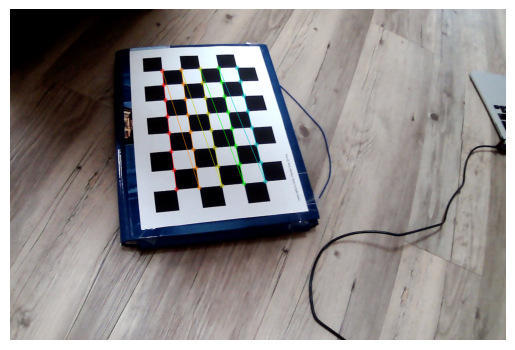

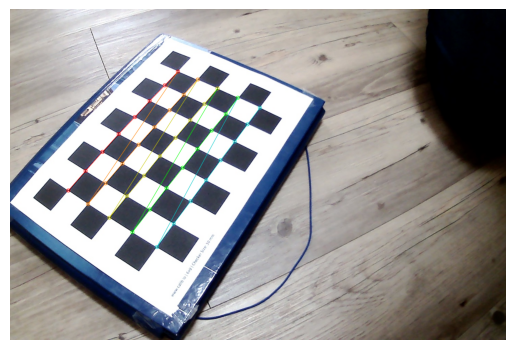

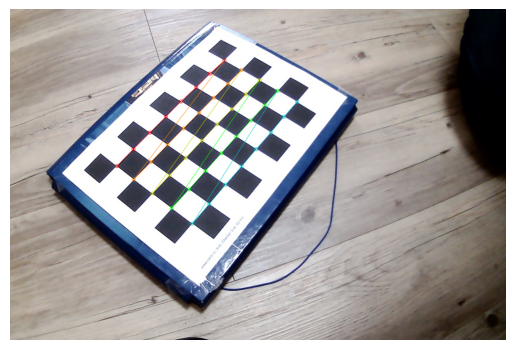

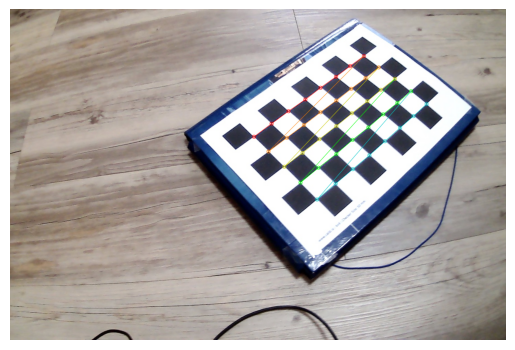

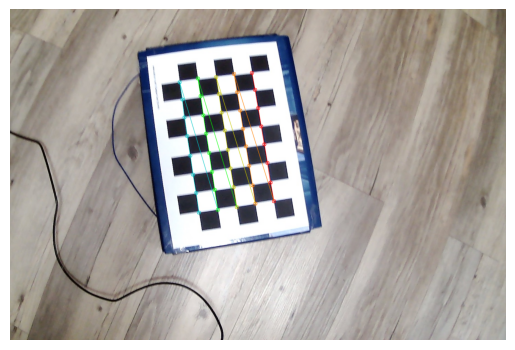

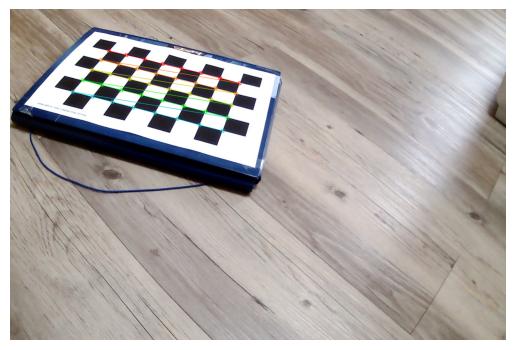

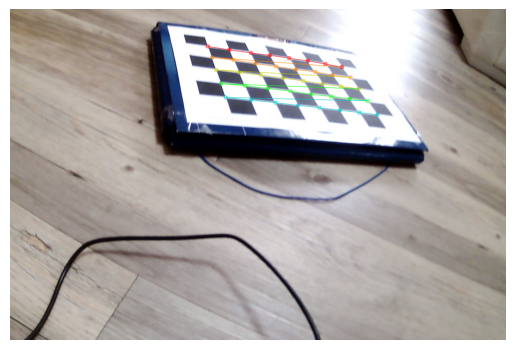

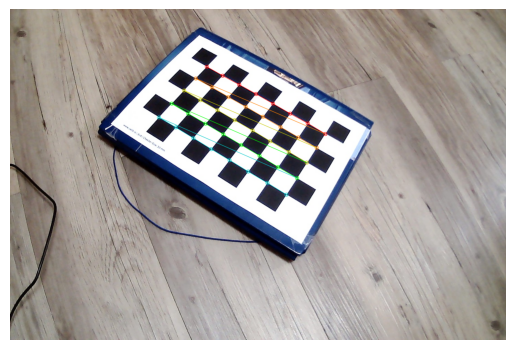

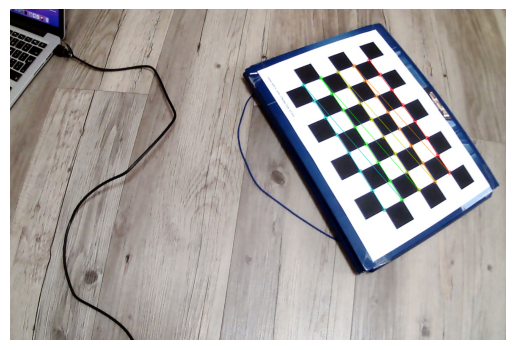

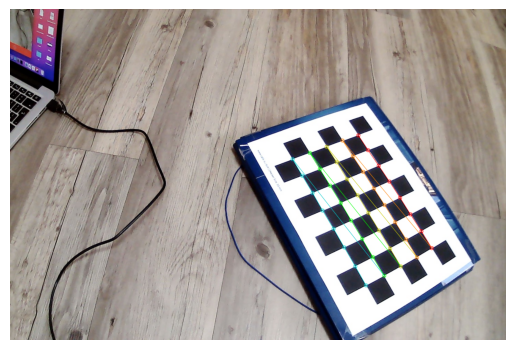

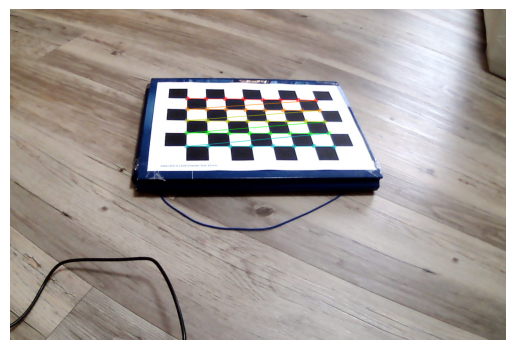

In [19]:

for i in range(17):
  cv2_imshow(photo_chessboard[i])


Part 2 of the task

In [20]:
import numpy as np

In [21]:
obj3d = np.zeros((5*8, 3), np.float32)
obj3d[:, :2] = np.mgrid[0:8, 0:5].T.reshape(-1, 2) # Assuming a chessboard with 8x5 internal corners and a square size of 1 unit

# Vector to store 3D points
obj_points = []
# Vector to store 2D points
img_points = []

for i in range(len(photos)): # Iterate through all photos
  found, chessboard_corners = cv2.findChessboardCorners(photos[i], [8,5])
  if found == False:
      print("No chessboard found in", images[i])
  else:
    obj_points.append(obj3d)
    img_points.append(chessboard_corners)

# Get image size from one of the photos
img_size = (photos[0].shape[1], photos[0].shape[0])

ret, camera_mat, distortion, rotation_vecs, translation_vecs = cv2.calibrateCamera(obj_points, img_points, img_size, None, None, flags=cv2.CALIB_FIX_K3)

No chessboard found in img01.jpg
No chessboard found in img05.jpg
No chessboard found in img10.jpg
No chessboard found in img16.jpg


In [22]:
print("Error in projection : \n", ret)
print("\nCamera matrix : \n", camera_mat)
print("\nDistortion coefficients : \n", distortion)
print("\nRotation vector : \n", rotation_vecs)
print("\nTranslation vector : \n", translation_vecs)

Error in projection : 
 0.9234793653906185

Camera matrix : 
 [[1.20130839e+03 0.00000000e+00 6.94486108e+02]
 [0.00000000e+00 1.23150172e+03 5.20065490e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients : 
 [[-0.25231906 -0.05452982 -0.02332801  0.00203703  0.        ]]

Rotation vector : 
 (array([[-0.64452323],
       [ 0.08424261],
       [ 0.57766142]]), array([[-0.66855482],
       [ 0.18212302],
       [ 1.32248041]]), array([[-0.59804294],
       [ 0.20689055],
       [ 0.65757773]]), array([[-0.07911549],
       [-0.71046686],
       [-2.73118006]]), array([[-0.2573605 ],
       [-0.59033938],
       [-1.67826924]]), array([[-0.50880937],
       [-0.3543704 ],
       [-1.01574073]]), array([[-0.46373844],
       [-0.25394045],
       [-0.91193103]]), array([[-2.04879148e-01],
       [-1.03185084e-03],
       [ 1.40888825e+00]]), array([[-0.80305597],
       [-0.11237028],
       [ 0.23244494]]), array([[-0.78609585],
       [-0.35471446],
       [-0

In [23]:
print("Error in projection : \n", ret)
print("\nCamera matrix : \n", camera_mat)
print("\nDistortion coefficients : \n", distortion)
print("\nRotation vector : \n", rotation_vecs)
print("\nTranslation vector : \n", translation_vecs)

Error in projection : 
 0.9234793653906185

Camera matrix : 
 [[1.20130839e+03 0.00000000e+00 6.94486108e+02]
 [0.00000000e+00 1.23150172e+03 5.20065490e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients : 
 [[-0.25231906 -0.05452982 -0.02332801  0.00203703  0.        ]]

Rotation vector : 
 (array([[-0.64452323],
       [ 0.08424261],
       [ 0.57766142]]), array([[-0.66855482],
       [ 0.18212302],
       [ 1.32248041]]), array([[-0.59804294],
       [ 0.20689055],
       [ 0.65757773]]), array([[-0.07911549],
       [-0.71046686],
       [-2.73118006]]), array([[-0.2573605 ],
       [-0.59033938],
       [-1.67826924]]), array([[-0.50880937],
       [-0.3543704 ],
       [-1.01574073]]), array([[-0.46373844],
       [-0.25394045],
       [-0.91193103]]), array([[-2.04879148e-01],
       [-1.03185084e-03],
       [ 1.40888825e+00]]), array([[-0.80305597],
       [-0.11237028],
       [ 0.23244494]]), array([[-0.78609585],
       [-0.35471446],
       [-0

# Task
Undistort the images using the calibrated camera parameters and display the original and undistorted images side by side. Use `cv2.getOptimalNewCameraMatrix`, `cv2.initUndistortRectifyMap`, and `cv2.remap` with `R = np.eye(3)`, `m1type=cv2.CV_32FC1`, and `interpolation=cv2.INTER_LINEAR`.

## Get optimal new camera matrix

### Subtask:
Calculate the new camera matrix and the region of interest (ROI) using `cv2.getOptimalNewCameraMatrix`.


**Reasoning**:
Calculate the new camera matrix and the ROI using `cv2.getOptimalNewCameraMatrix` based on the calibrated camera parameters and image size.



In [26]:
new_camera_mat, roi = cv2.getOptimalNewCameraMatrix(camera_mat, distortion, img_size, 1, img_size)

## Initialize undistort/rectify map

### Subtask:
Compute the undistortion and rectification maps using `cv2.initUndistortRectifyMap`.


**Reasoning**:
Compute the undistortion and rectification maps using `cv2.initUndistortRectifyMap`.



In [27]:
map1, map2 = cv2.initUndistortRectifyMap(camera_mat, distortion, np.eye(3), new_camera_mat, img_size, cv2.CV_32FC1)

## Remap and undistort images

### Subtask:
Apply the computed maps to each image using `cv2.remap` to undistort them.


**Reasoning**:
Iterate through the original images, apply the undistortion maps to each image using cv2.remap with linear interpolation, and store the undistorted images in a list.



In [28]:
undistorted_photos = []
for photo in photos:
  undistorted_img = cv2.remap(photo, map1, map2, interpolation=cv2.INTER_LINEAR)
  undistorted_photos.append(undistorted_img)

## Display images

### Subtask:
Display the original and undistorted images side by side for comparison.


**Reasoning**:
Iterate through the original and undistorted images and display them side by side.



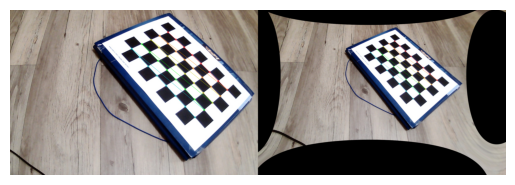

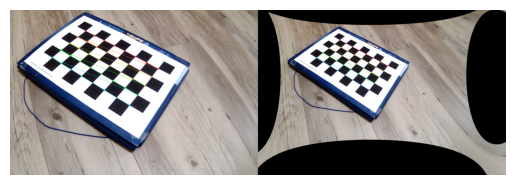

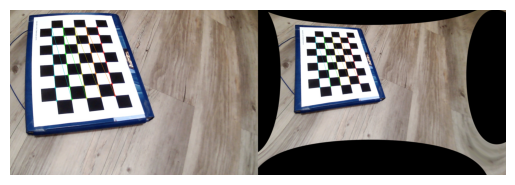

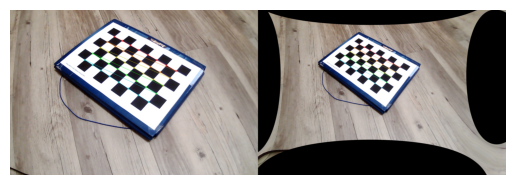

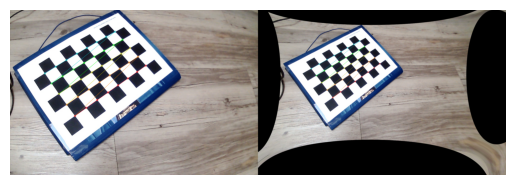

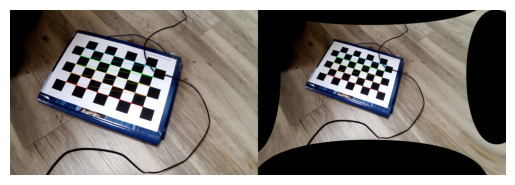

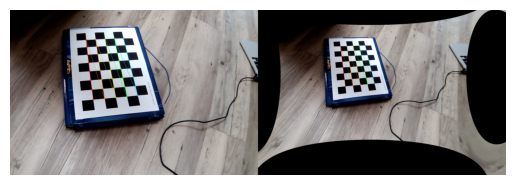

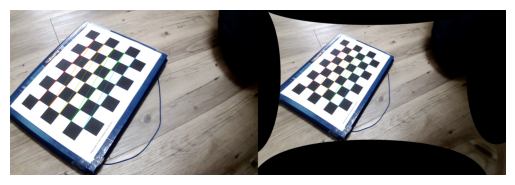

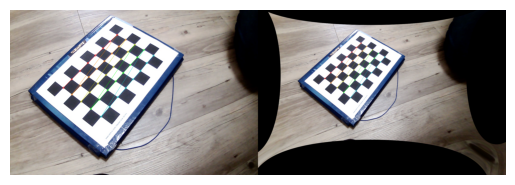

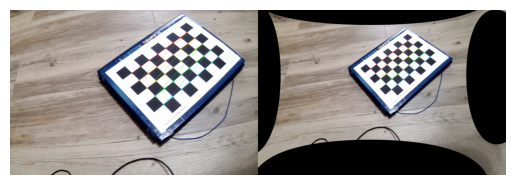

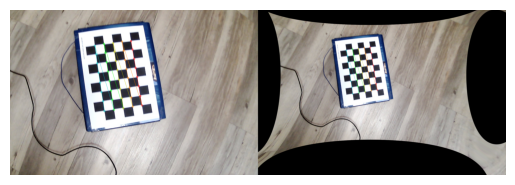

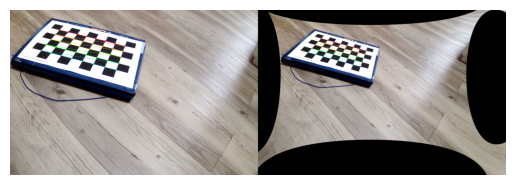

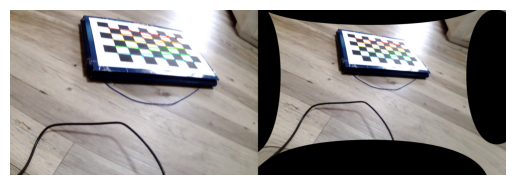

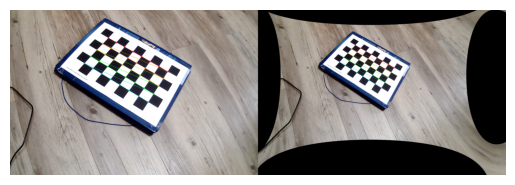

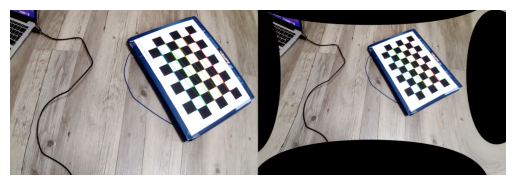

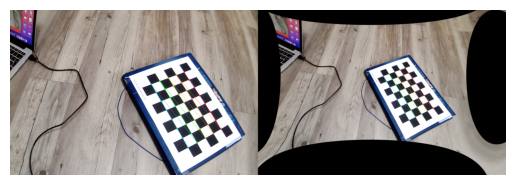

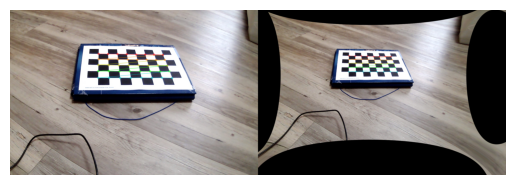

In [29]:
for i in range(len(photos)):
    combined_img = np.hstack((photos[i], undistorted_photos[i]))
    cv2_imshow(combined_img)


## Summary:

### Data Analysis Key Findings

*   The new camera matrix and region of interest (ROI) were successfully calculated using `cv2.getOptimalNewCameraMatrix`.
*   Undistortion and rectification maps (`map1` and `map2`) were computed using `cv2.initUndistortRectifyMap` with an identity matrix for rectification and the calculated new camera matrix.
*   Each original image was successfully undistorted by applying the computed maps using `cv2.remap` with linear interpolation.
*   The original and corresponding undistorted images were displayed side by side for visual comparison.

### Insights or Next Steps

*   The calculated ROI could be used to crop the undistorted images to remove the black borders introduced during the undistortion process.
*   The undistorted images can now be used for further computer vision tasks that require corrected perspectives, such as object detection or measurement.
